In [15]:
import cmdstanpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [24]:
sns.set()  # Nice plot aesthetic
np.random.seed(101)

f = open("stan_model.stan", "x")
stan_model = """
data {
    int<lower=0> N;
    vector[N] x;
    vector[N] y;
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}
model {
    y ~ normal(alpha + beta * x, sigma);
}
"""
f.write(stan_model)
f.close()

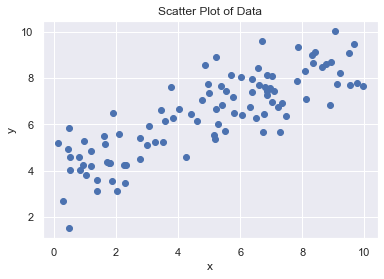

In [36]:
# Parameters to be inferred
alpha = 4.0
beta = 0.5
sigma = 1.0

# Generate and plot data
x = 10 * np.random.rand(100)
y = alpha + beta * x
y = np.random.normal(y, scale=sigma)
plt.scatter(x, y)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of Data')
plt.show()

In [25]:
# Put our data in a dictionary
data = {'N': len(x), 'x': x, 'y': y}

# instantiate the model
model = cmdstanpy.CmdStanModel(stan_file="stan_model.stan")

#fir the model
fit = model.sample(data=data)
print(fit)

INFO:cmdstanpy:compiling stan program, exe file: /Users/philip/Documents/research/bp/stan_model
INFO:cmdstanpy:compiler options: stanc_options={}, cpp_options={}
INFO:cmdstanpy:compiled model file: /Users/philip/Documents/research/bp/stan_model
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


CmdStanMCMC: model=stan_model chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/var/folders/kc/8f75rwcj3qb9w9wyprnlhdhm0000gn/T/tmpqfpooq_d/stan_model-202111021220-1-2_mij9gy.csv
	/var/folders/kc/8f75rwcj3qb9w9wyprnlhdhm0000gn/T/tmpqfpooq_d/stan_model-202111021220-2-yc1vmaad.csv
	/var/folders/kc/8f75rwcj3qb9w9wyprnlhdhm0000gn/T/tmpqfpooq_d/stan_model-202111021220-3-65bh1705.csv
	/var/folders/kc/8f75rwcj3qb9w9wyprnlhdhm0000gn/T/tmpqfpooq_d/stan_model-202111021220-4-wms4ta7t.csv
 output_files:
	/var/folders/kc/8f75rwcj3qb9w9wyprnlhdhm0000gn/T/tmpqfpooq_d/stan_model-202111021220-1-2_mij9gy-stdout.txt
	/var/folders/kc/8f75rwcj3qb9w9wyprnlhdhm0000gn/T/tmpqfpooq_d/stan_model-202111021220-2-yc1vmaad-stdout.txt
	/var/folders/kc/8f75rwcj3qb9w9wyprnlhdhm0000gn/T/tmpqfpooq_d/stan_model-202111021220-3-65bh1705-stdout.txt
	/var/folders/kc/8f75rwcj3qb9w9wyprnlhdhm0000gn/T/tmpqfpooq_d/stan_model-202111021220-4-wms4ta7t-stdout.txt


In [31]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-51.00,0.03500,1.300,-53.00,-50.00,-49.00,1300.0,3000.0,1.0
alpha,3.90,0.00500,0.210,3.50,3.90,4.20,1800.0,4000.0,1.0
beta,0.52,0.00088,0.036,0.46,0.52,0.58,1700.0,3900.0,1.0
sigma,1.00,0.00160,0.073,0.91,1.00,1.10,2200.0,5000.0,1.0


In [59]:
alpha = fit.stan_variable(var="alpha")
beta = fit.stan_variable(var="beta")
sigma = fit.stan_variable(var="sigma")

f = fit.summary()
alpha_mean = f["Mean"]["alpha"]
beta_mean = f["Mean"]["beta"]


(-0.5, 10.5)

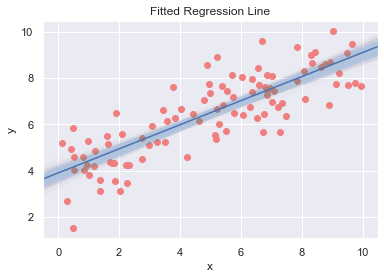

In [64]:
x_min, x_max = -0.5, 10.5
x_plot = np.linspace(x_min, x_max, 100)

# Plot a subset of sampled regression lines
for i in np.random.randint(0, len(alpha), 1000):
    plt.plot(x_plot, alpha[i] + beta[i] * x_plot, color='lightsteelblue',
            alpha=0.005)

# Plot mean regression line  
plt.plot(x_plot, alpha_mean + beta_mean * x_plot)
plt.scatter(x, y, color="lightcoral")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitted Regression Line')
plt.xlim(x_min, x_max)